# Premier Neurone : Regression logistique

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
# !pip install tqdm

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm import tqdm

# 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


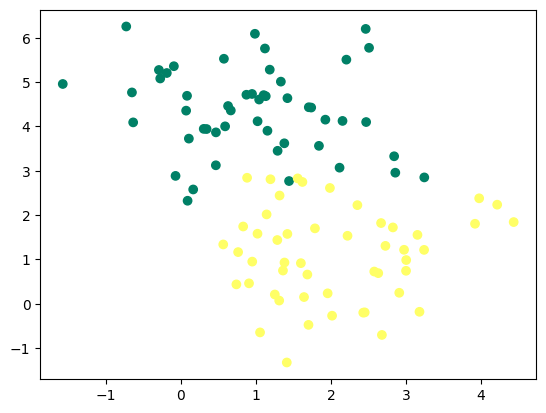

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

In [4]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

# Q1. Définir le model :
##              Z=X.W +b
##              A=1/(1+exp(-Z))

In [5]:
def model(X, W, b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

# Q2. Programmer la fonction LogLos


In [6]:
def log_loss(A, y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

# Q3. Calcul des gradients

In [7]:
def gradients(A, X, y):
    dW = 1/len(y)*np.dot(X.T, (A-y))
    db = 1/len(y)*np.sum(A-y)
    return (dW, db)

# Q4. Algorithme de Gradient descente

In [8]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

# Calcul de la prédiction

In [9]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [10]:
from sklearn.metrics import accuracy_score

# Q5. Compléter la fonction pour retourner les poids W et b
## Calculer aussi l'accuracy et afficher la courbe du Loss

In [11]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)


    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)


0.89


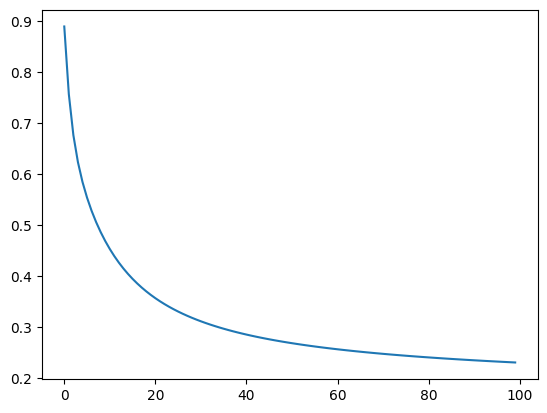

In [12]:
W, b = artificial_neuron(X, y)

# 3. Frontiere de décision

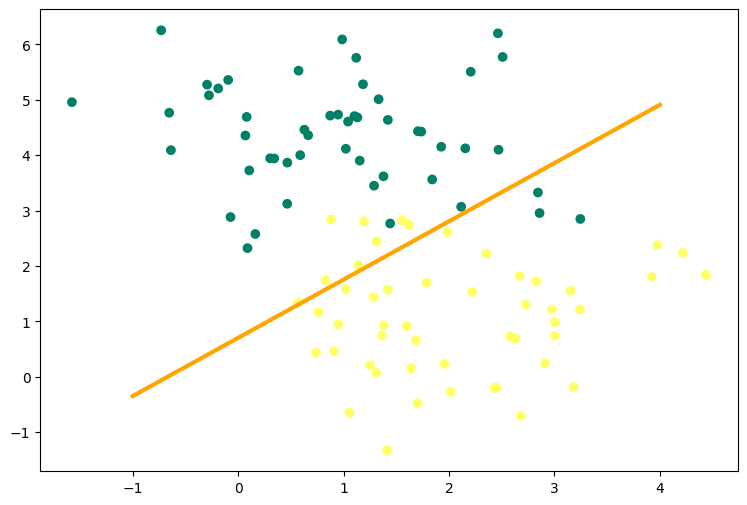

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# Q6. (bonus) Implémenter un réseau de Neurone avec deux couches pour
# traiter un problème de classification non linéaire ( utiliser un dataset du TP2)

In [23]:
def initialisation_2couche(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return params

In [26]:
def forward_pass(X, params):

    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [27]:
def back_propagation(X, y, params, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = params['W2']
    dZ2 = A2 - y
    dW2 = 1 /(y.shape[1]) * dZ2.dot(A1.T)
    db2 = 1 / (y.shape[1]) * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / (y.shape[1]) * dZ1.dot(X.T)
    db1 = 1 / (y.shape[1]) * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

In [28]:
def update(gradients, params, learning_rate):

    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    news_params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return news_params

In [29]:
def predict(X, params):
  activations = forward_pass(X, params)
  A2 = activations['A2']
  return A2 >= 0.5

In [30]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation_2couche(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_pass(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

dimensions de X: (2, 500)
dimensions de y: (1, 500)


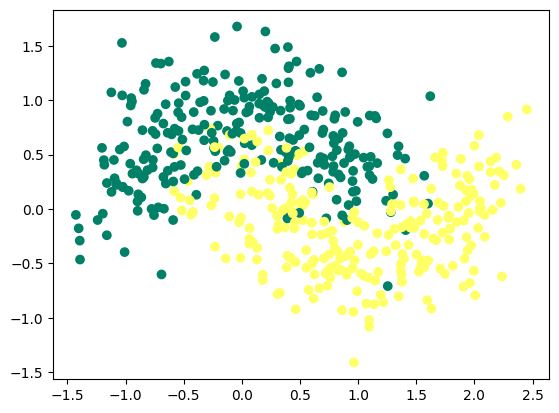

In [34]:
## Dataset pour simuler le model
#Ensemble 2
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.3,random_state=0)
X = X.T # Attention il faut transposer le le vecteur X pour en faire (2,n)
y = y.reshape((1, y.shape[0])) # Il faut reshape le y pour eviter (,n),il faut lui donner une ligne sinon par defaut ya rien

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
<ipython-input-6-e3f45745ebc4>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y)*np.sum(-y*np

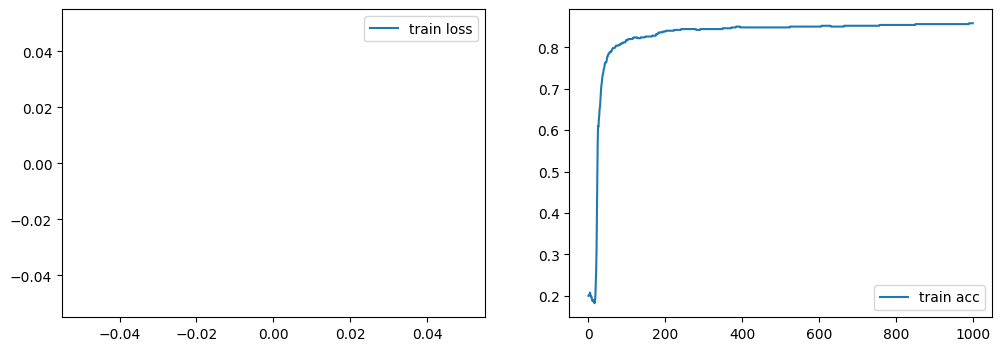

{'W1': array([[ 1.7449669 ,  0.28587004],
        [ 0.75280061,  2.41631518],
        [ 2.07942128, -0.52047229],
        [ 0.92319952, -0.52549503],
        [-0.58251912,  1.0403173 ],
        [-0.05393169,  1.58051826],
        [ 0.83210616, -0.36274041],
        [ 0.48425678,  0.27874722],
        [ 1.14310934, -0.92614709],
        [-0.25375896, -0.2770238 ],
        [-2.50943088,  0.67223033],
        [ 0.76647288, -0.54944574],
        [ 2.32198547, -1.33520277],
        [-0.28930458,  0.18108845],
        [ 1.49908986,  1.57232855],
        [ 0.11819997,  0.41872303],
        [-1.25082122, -1.6885956 ],
        [ 0.07977466, -0.28234271],
        [ 1.31186004,  1.0581296 ],
        [-0.73177687,  0.69759874],
        [-0.45293231, -1.97083435],
        [-1.95993972,  1.55125646],
        [ 0.1607485 , -1.0384993 ],
        [-1.06831595,  1.13325028],
        [-1.38704814,  0.41119508],
        [-0.72259848, -0.00323453],
        [-0.64892775, -1.03590795],
        [ 0.48436548, 

In [35]:
neural_network(X, y)